# Learning Equality - Curriculum Recommendations
Streamline the process of matching educational content to specific topics in a curriculum. Library of K-12 educational materials that have been organized into a variety of topic taxonomies. These materials are in diverse languages, and cover a wide range of topics, particularly in STEM (Science, Technology, Engineering, and Mathematics).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Read all the csv files to pandas dataframes.
df_cont = pd.read_csv('content.csv')
df_top = pd.read_csv('topics.csv')
df_corr = pd.read_csv('correlations.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [22]:
#Topics contains a row for each topic in the dataset. These topics are organized into "channels", with each channel 
#containing a single "topic tree" (which can be traversed through the "parent" reference). Note that the hidden 
#dataset used for scoring contains additional topics not in the public version. 
#You should only submit predictions for those topics listed in sample_submission.csv.
df_top.head()

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


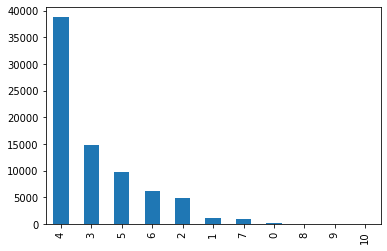

In [31]:
#Plot fifferent languages and number of titles
#df_top.language.value_counts().plot(kind='bar')
df_top.level.value_counts().plot(kind='bar')

In [28]:
#DO NOT RUN NOW
#df_top['pare_top'] = df_top['parent'] + '_' + df_top['id']
df_top.head()

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


In [33]:
#Content contains a row for each content item in the dataset. Note that the hidden dataset used for scoring contains 
#additional content items not in the public version. These additional content items are only correlated to topics 
#in the test set. Some content items may not be correlated with any topic.
df_cont.head()

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


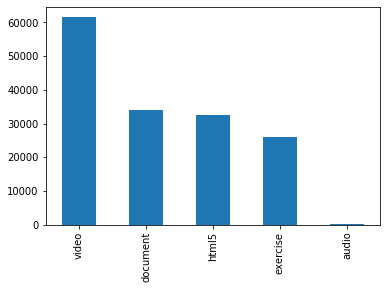

In [34]:
#df_cont.language.value_counts().plot(kind='bar')
df_cont.kind.value_counts().plot(kind='bar')

In [ ]:
#The content items associated to topics in the training set. A single content item may be associated to more than 
#one topic. In each row, we give a topic_id and a list of all associated content_ids. These comprise the targets of 
#the training set.
df_corr.head()

In [3]:
#Explode the correlation dataframe to two columns. Topics and all the contents under each topic.
df_corr["content_ids"] = df_corr["content_ids"].str.split(" ")
df_corr_exp = df_corr.explode('content_ids')
df_corr_exp

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d
0,t_00004da3a1b2,c_376c5a8eb028
0,t_00004da3a1b2,c_5bc0e1e2cba0
0,t_00004da3a1b2,c_76231f9d0b5e
1,t_00068291e9a4,c_639ea2ef9c95
...,...,...
61513,t_fff9e5407d13,c_d64037a72376
61514,t_fffbe1d5d43c,c_46f852a49c08
61514,t_fffbe1d5d43c,c_6659207b25d5
61515,t_fffe14f1be1e,c_cece166bad6a


In [ ]:
#Check for NaN values.
df_cont.isnull().sum()

In [ ]:
df_cont1 = df_cont[['id','title','kind','language']]
df_cont1.head()

In [4]:
#Join exploded correlation dataframe and topic dataframe with details.
df1 = df_corr_exp.set_index('topic_id').join(df_top.set_index('id'))

In [5]:
#Rename topic columns so those are not conflicting with content column headers.
df1.rename(columns = {'title':'t_title', 'description':'t_description', 'language':'t_language'}, inplace = True)
df1.head()

,content_ids,t_title,t_description,channel,category,level,t_language,parent,has_content
t_00004da3a1b2,c_1108dd0c7a5d,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
t_00004da3a1b2,c_376c5a8eb028,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
t_00004da3a1b2,c_5bc0e1e2cba0,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
t_00004da3a1b2,c_76231f9d0b5e,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
t_00068291e9a4,c_639ea2ef9c95,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True


In [ ]:
df_sub.head()

In [ ]:
df2.info()

In [6]:
#Join content dataframe with topic. Use topic id as a key.
df1.reset_index(inplace=True)
df2 = df1.set_index('content_ids').join(df_cont.set_index('id'))
df2.reset_index(inplace=True)
df2.rename(columns = {'index':'id', 'level_0':'cont_id'}, inplace = True)
column_to_reorder = df2.pop('cont_id')
df2.insert(len(df2.columns), 'cont_id', column_to_reorder)
df2.sort_values(['id', 'cont_id'], ascending = [True, True], inplace=True)
df2['t_title'] = df2['t_title'].str.lower()
df2.head()

,id,t_title,t_description,channel,category,level,t_language,parent,has_content,title,description,kind,text,language,copyright_holder,license,cont_id
18637,t_00004da3a1b2,откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,Молив като резистор,"Моливът причинява промяна в отклонението, подо...",video,NaN,bg,NaN,NaN,c_1108dd0c7a5d
61160,t_00004da3a1b2,откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,Да чуем променливото съпротивление,Тук чертаем линия на лист хартия и я използвам...,video,NaN,bg,NaN,NaN,c_376c5a8eb028
100695,t_00004da3a1b2,откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,Променлив резистор (реостат) с графит от молив,Използваме сърцевината на молива (неговия граф...,video,NaN,bg,NaN,NaN,c_5bc0e1e2cba0
129225,t_00004da3a1b2,откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,Последователно свързване на галваничен елемент...,"Защо отклонението се променя, когато се свърже...",video,NaN,bg,NaN,NaN,c_76231f9d0b5e
109125,t_00068291e9a4,entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,Dados e resultados de funções: gráficos,Encontre todas as entradas que correspondem a ...,exercise,NaN,pt,NaN,NaN,c_639ea2ef9c95


In [7]:
#Let's get rid off some unnecessary columns
df2.drop(['t_description','category','has_content','description','text','copyright_holder','license'], axis=1, inplace=True)
df2.drop(['channel','level','t_language','title','kind'], axis=1, inplace=True)

In [ ]:
df2.loc[:, df2.isnull().any()]

In [ ]:
#Check if topic and content langauge is different.
df2['t_language'].equals(df2['language'])

In [ ]:
#Check how many rows with different language. Over 1000 rows found, is it a problem?
df2.loc[df2['t_language'] != df2['language']].shape

In [8]:
#Drop rows with NaN
df2.dropna(inplace=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279892 entries, 18637 to 160669
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        279892 non-null  object
 1   t_title   279892 non-null  object
 2   parent    279892 non-null  object
 3   language  279892 non-null  object
 4   cont_id   279892 non-null  object
dtypes: object(5)
memory usage: 12.8+ MB


In [ ]:
df2.duplicated(subset='t_title').sum()

In [ ]:
df2 = df2.drop_duplicates(subset='t_title')

In [10]:
#Take randon samples to cut training time, 20%
sample_size = np.int_(len(df2)*0.1)
#sample_size = 25000
df2 = df2.sample(n=sample_size, replace=False, random_state=110)
df2 = df2.reset_index()
df2 = df2.drop('index',axis=1)
df2

,id,t_title,parent,language,cont_id
0,t_29bcb6c5e1fe,trecho d5: sistema muscular,t_c1628c2e2d84,pt,c_7e6168ac0ccf
1,t_f918c59124c4,les diagrammes à images,t_e0527fee6597,fr,c_d3d07bf33109
2,t_ee365c25e4d5,মায়েদের জন্য,t_3296a10091eb,bn,c_74d61b6e3e53
3,t_47d7091d7866,11.2 compound interest and depreciation,t_20b214a5323c,en,c_76476ce632e3
4,t_f196ad297baa,exponential functions from tables & graphs,t_d396373a922b,en,c_b53bd50f7b00
...,...,...,...,...,...
27984,t_6de40c2bf57b,pulley,t_515b1c008560,en,c_6cd36426b236
27985,t_966af6094e81,fonctions affines et interprétation des données,t_3c10478529d0,fr,c_5152631ae973
27986,t_0562421e838e,topic b: lessons 10-11: adding & subtracting r...,t_362e83335bf8,en,c_5b4e9a2921df
27987,t_e8057cc1b723,4 contamos historias a través de la narrativa ...,t_086c76a6329b,es,c_2364ddfe5ae1


In [ ]:
def clean_text(author):
    result = str(author).lower()
    return(result.replace(' ',''))

In [ ]:
df2['t_title'] = df2['t_title'].apply(clean_text)
df2['title'] = df2['title'].apply(clean_text)

In [ ]:
def datacolumn

In [ ]:
def vectorizer

In [ ]:
def similarity

## Topic-Content similarities

In [11]:
#Consolidate all the columns into one column 'data'
df2['data'] = df2[df2.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
df2['data'].head()

0    trecho d5: sistema muscular t_c1628c2e2d84 pt ...
1    les diagrammes à images t_e0527fee6597 fr c_d3...
2        মায়েদের জন্য t_3296a10091eb bn c_74d61b6e3e53
3    11.2 compound interest and depreciation t_20b2...
4    exponential functions from tables & graphs t_d...
Name: data, dtype: object

In [12]:
#Count vectorize the data column, count the words in title
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(df2['data'])

In [13]:
#Use cosine algorithm for similarity. '0' vectors are not similar, '1' vectors are a match
similarities = cosine_similarity(vectorized)
similarities

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.18257419],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.18257419, 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Content-Content similarities

In [ ]:
#Take randon samples to cut training time, 20%
sample_size = np.int_(len(df_cont1)*0.1)
#sample_size = 25000
df_cont1 = df_cont1.sample(n=sample_size, replace=False, random_state=110)
df_cont1 = df_cont1.reset_index()
df_cont1 = df_cont1.drop('index',axis=1)
df_cont1

In [ ]:
#Consolidate all the columns into one column 'data'
df_cont1['data'] = df_cont1[df_cont1.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
df_cont1['data'].head()

In [ ]:
#Count vectorize the data column, count the words in title
vectorizer = CountVectorizer()
cont_vectorized = vectorizer.fit_transform(df_cont1['data'])

In [ ]:
#Use cosine algorithm for similarity. '0' vectors are not similar, '1' vectors are a match
cont_similarities = cosine_similarity(cont_vectorized)
cont_similarities

In [ ]:
df4 = pd.DataFrame(cont_similarities, columns=df_cont1['id'], index=df_cont1['id']).reset_index()
df4.head()

In [ ]:
input_title = 'c_41f96bc4433e'
recommendations = pd.DataFrame(df4.nlargest(20,input_title)['id'])
#recommendations = recommendations[recommendations['id']!=input_title]
recommendations

In [ ]:
ll3=[]
ll4=[]
recs = recommendations.id.values.tolist()
for i in range(len(recs)):
    ll3.append(list(df4.loc[df4['id'] == recs[i], input_title]))
    ll4.append(list(df_cont1.loc[df_cont1['id'] == recs[i], 'title']))
ll3 = [i[0] for i in ll3]
ll4 = [i[0] for i in ll4]
recommendations['similarity'] = ll3
recommendations['title'] = ll4
recommendations.head(15) 

## Content-Content similarities ends

In [14]:
similarities.shape

(27989, 27989)

In [15]:
#Map it back to dataframe with names
#df3 = pd.DataFrame(similarities, columns=df2['t_title'], index=df2['t_title']).reset_index()
#df3 = pd.DataFrame(similarities, columns=df2['cont_id'], index=df2['id'])
df3 = pd.DataFrame(similarities, columns=df2['id'], index=df2['cont_id']).reset_index()
df3.head()

id,cont_id,t_29bcb6c5e1fe,t_f918c59124c4,t_ee365c25e4d5,t_47d7091d7866,t_f196ad297baa,t_1749d5e5f816,t_38781c143cdb,t_a34e71e9141f,t_9038f1da6033,...,t_3feeeaf26fd6,t_8101e3633861,t_a096ba27a226,t_723bdd32a89e,t_106c0354a3e3,t_6de40c2bf57b,t_966af6094e81,t_0562421e838e,t_e8057cc1b723,t_819fe94f5328
0,c_7e6168ac0ccf,1.0,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.308607,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,c_d3d07bf33109,0.0,1.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.136083,0.000000,0.0,0.182574
2,c_74d61b6e3e53,0.0,0.0,1.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,c_76476ce632e3,0.0,0.0,0.0,1.000,0.125,0.079057,0.158114,0.158114,0.158114,...,0.000000,0.0,0.0,0.0,0.0,0.176777,0.000000,0.213201,0.0,0.000000
4,c_b53bd50f7b00,0.0,0.0,0.0,0.125,1.000,0.079057,0.158114,0.158114,0.158114,...,0.000000,0.0,0.0,0.0,0.0,0.176777,0.000000,0.106600,0.0,0.000000


In [19]:
input_title = 't_1749d5e5f816'
recommendations = pd.DataFrame(df3.nlargest(15,input_title)['cont_id'])
#recommendations = recommendations[recommendations['cont_id']!=input_title]
recommendations

,cont_id
5,c_61c67faf83dd
5901,c_df19e6b6b79f
12595,c_86cabfe6a62c
5302,c_2d5a874ade2b
10676,c_5526414c5e75
11932,c_6202ab3073e0
11870,c_4f01c44d2254
12527,c_47439b58c8c0
23154,c_c63a7ed0f912
23795,c_d08720ccc03c


In [ ]:
ll3=[]
recs = recommendations.cont_id.values.tolist()
for i in range(len(recs)):
    ll3.append(df3.loc[df3['cont_id'] == recs[i], input_title])
ll3    

In [20]:
#for rec in recommendations.cont_id.values.tolist():
#    print(df_cont[df_cont['id'] == rec])
#create recommendations dataframe with three columns    
ll3=[]
ll4=[]
recs = recommendations.cont_id.values.tolist()
for i in range(len(recs)):
    ll3.append(list(df3.loc[df3['cont_id'] == recs[i], input_title]))
    ll4.append(list(df_cont.loc[df_cont['id'] == recs[i], 'title']))
ll3 = [i[0] for i in ll3]
ll4 = [i[0] for i in ll4]
recommendations['similarity'] = ll3
recommendations['title'] = ll4
recommendations.head(15)     

,cont_id,similarity,title
5,c_61c67faf83dd,1.000000,States of Water Practice
5901,c_df19e6b6b79f,0.424264,Removal of Temporary Hardness of Water
12595,c_86cabfe6a62c,0.424264,Excretion
5302,c_2d5a874ade2b,0.421637,Inclination of a Line
10676,c_5526414c5e75,0.404520,English: Introducing Green Chemistry: The Scie...
11932,c_6202ab3073e0,0.404520,Basics of chromatography
11870,c_4f01c44d2254,0.395285,Breaking down photosynthesis stages
12527,c_47439b58c8c0,0.395285,Light and Dark Reactions
23154,c_c63a7ed0f912,0.395285,Defining Chemistry
23795,c_d08720ccc03c,0.395285,Definition of Physics


In [21]:
df_top[df_top['id'] == 't_1749d5e5f816']

,id,title,description,channel,category,level,language,parent,has_content
6930,t_1749d5e5f816,5.1.1 Sources of water: Burning of organic mat...,Materials in this folder have been reviewed by...,c7ca13,aligned,6,en,t_f32fb8659544,True


## Sandbox

In [ ]:
#Split data to training and test sets.
X = df2.drop(['cont_id'],axis=1)
y = df2['cont_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#len(pd.unique(df_top['id']))
df_top.nunique(axis=0)

In [ ]:
#df_cont['license'].unique()
df_cont['license'].drop_duplicates()

In [ ]:
df_top.nunique(axis=0)

In [ ]:
df_sub.nunique(axis=0)

In [ ]:
#df_top['content_ids'] = df_corr.loc[df_corr['topic_id'] == df_top['id']]['content_ids'
#df_top.merge(df_corr, left_on='id', right_on='topic_id')
df_top_cont = df_top.set_index('id').join(df_corr.set_index('topic_id'))

In [ ]:
df_top_cont[df_top_cont['parent'] == 't_16e29365b50d']

In [ ]:
plt.rcParams["figure.figsize"]=14,8
#df_top_cont['length'].plot()
#df_top_cont['length'][df_top_cont['length'] >1000].plot()
#df_top_cont['length'].plot.hist(bins=6, alpha=0.9)
#df_top_cont.plot.hist(column=['length'],by="level")
sns.distplot(df_top_cont["length"])
#sns.kdeplot(data=df_top_cont, x="length", hue="level")
#sns.displot(data=df_top_cont, x='length', hue='level', kind='kde')

In [ ]:
#from plotnine.data import diamonds  # dataset

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(df_top_cont, col='level', hue='level', col_wrap=5)

# draw density plots
g = g.map(sns.kdeplot,"length")

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

In [ ]:
df_top_cont['length'] = df_top_cont['content_ids'].str.split(" ").str.len()

In [ ]:
maxl = df_top_cont['length'].max()
df_top_cont.drop(df_top_cont[df_top_cont['length']==maxl].index,inplace=True)

In [ ]:
df_top_cont['length'].max()

In [ ]:
df_top_cont.content_ids.str.split(expand=True)